In [109]:
import sys
sys.path.append("../../..")

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from src.adapters.detectors import YOLODetector
from src.app.configs.detectors import YOLODetectorConfig
from src.adapters.cameras import OpenCVCamera
from src.app.configs.cameras import OpenCVCameraConfig

In [110]:
camera_config = OpenCVCameraConfig()
camera = OpenCVCamera(camera_config)

In [111]:
detector_config = YOLODetectorConfig(
    weights_path="../../../weights/best.pt",
    classes=dict(enumerate([
        "apple",
        "cucumber",
        "grape",
        "kiwi",
        "lemon",
        "orange",
        "pear",
        "pineapple",
        "potato",
        "tomato",
        "watermelon",
    ])),
    confidence_threshold=0.4,
    iou_threshold=0.2,
    device="cpu"
)
detector = YOLODetector(detector_config)

In [112]:
frame = camera.read()
detections = detector.detect(frame)

In [113]:
detections

[Detection(class_id=1, confidence=0.7503182888031006, bbox=(314, 0, 564, 316))]

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

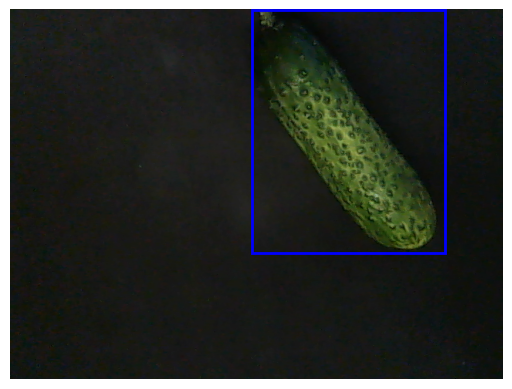

In [114]:
fig, ax = plt.subplots(1, 1)
plt.imshow(frame)

for det in detections:
    bbox = patches.Rectangle(
        xy=det.bbox[:2], 
        width=det.bbox[2] - det.bbox[0], 
        height=det.bbox[3] - det.bbox[1], 
        linewidth=2, 
        edgecolor='blue', 
        facecolor='none'
    )
    ax.add_patch(bbox)

plt.axis('off')